In [1]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image # tratamiento de imagenes
import PIL


# Web Scrapping

In [14]:
response = requests.get('https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/')

print(response)

<Response [200]>


In [15]:
soup = BeautifulSoup(response.text, "html.parser")

In [34]:
bloque_todo = soup.find(attrs = {'id': 'pages-2'}).find_all('li')
bloque_todo
lista_enlaces = [i.find('a')['href'] for i in bloque_todo[1:]]
lista_enlaces

['https://bigbangtrans.wordpress.com/series-1-episode-1-pilot-episode/',
 'https://bigbangtrans.wordpress.com/series-1-episode-2-the-big-bran-hypothesis/',
 'https://bigbangtrans.wordpress.com/series-1-episode-3-the-fuzzy-boots-corollary/',
 'https://bigbangtrans.wordpress.com/series-1-episode-4-the-luminous-fish-effect/',
 'https://bigbangtrans.wordpress.com/series-1-episode-5-the-hamburger-postulate/',
 'https://bigbangtrans.wordpress.com/series-1-episode-6-the-middle-earth-paradigm/',
 'https://bigbangtrans.wordpress.com/series-1-episode-7-the-dumpling-paradox/',
 'https://bigbangtrans.wordpress.com/series-1-episode-8-the-grasshopper-experiment/',
 'https://bigbangtrans.wordpress.com/series-1-episode-9-the-cooper-hofstadter-polarization/',
 'https://bigbangtrans.wordpress.com/series-1-episode-10-the-loobenfeld-decay/',
 'https://bigbangtrans.wordpress.com/series-1-episode-11-the-pancake-batter-anomaly/',
 'https://bigbangtrans.wordpress.com/series-1-episode-12-the-jerusalem-duality/

In [47]:
texto = ''
for i in lista_enlaces[1:]:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, "html.parser")
    dialogo = soup.find(attrs = {'class':'entrytext'}).find_all('p')
    for j in dialogo:
        texto += j.text+'\n'
texto

'Scene: Sheldon and Leonard’s apartment. Sheldon, Leonard, Howard and Raj are present.\nLeonard: There you go, Pad Thai, no peanuts.\nHoward: But does it have peanut oil?\nLeonard: Uh, I’m not sure, everyone keep an eye on Howard in case he starts to swell up.\nSheldon: Since it’s not bee season, you can have my epinephrine.\nRaj: Are there any chopsticks?\nSheldon: You don’t need chopsticks, this is Thai food.\nLeonard: Here we go.\nSheldon: Thailand has had the fork since the latter half of the nineteenth century. Interestingly they don’t actually put the fork in their mouth, they use it to put the food on a spoon which then goes into their mouth.\nLeonard: Ask him for a napkin, I dare you. (There is a knock on the door.) I’ll get it.\nHoward: Do I look puffy? I feel puffy.\n(Leonard opens door to Penny, steps into hallway)\nPenny: Hey Leonard.\nLeonard: Oh, hi Penny.\nPenny: Am I interrupting.\nLeonard: No.\nSheldon (off): You’re not swelling, Howard.\nHoward (off): No, no, look at 

In [48]:
fh = open('big_bang_texto.txt', 'w', encoding = 'utf8')
fh.write(texto)
fh.close()

# NLP Work

In [7]:
fh = open('big_bang_texto.txt', 'r', encoding = 'utf8')
bigbang = fh.read()

In [22]:
dialogos = [i.split(':') for i in re.findall(r'Sheldon:.*|Leonard:.*|Penny:.*|Raj:.*|Howard:.*',bigbang)]
dialogos

38608

In [9]:
nombres = {'Sheldon' : '',
           'Leonard' : '',
           'Penny'   : '',
           'Raj'     : '',
           'Howard'  : ''}
for i in dialogos:
    nombres[i[0]]+= i[1]
nombres


{'Sheldon': ' Since it’s not bee season, you can have my epinephrine. You don’t need chopsticks, this is Thai food. Thailand has had the fork since the latter half of the nineteenth century. Interestingly they don’t actually put the fork in their mouth, they use it to put the food on a spoon which then goes into their mouth. Hi. Don’t take it personally, it’s his pathology, he can’t talk to women. You’re kidding, right? You realise that scene was rife with scientific inaccuracy. Oh no, let’s assume that they can. Lois Lane is falling, accelerating at an initial rate of 32 feet per second per second. Superman swoops down to save her by reaching out two arms of steel. Miss Lane, who is now travelling at approximately 120 miles per hour, hits them, and is immediately sliced into three equal pieces.  In what space, sir, in what space? She’s two feet above the ground. Frankly, if he really loved her, he’d let her hit the pavement. It would be a more merciful death. Are you listening to your

In [10]:
for key in nombres:
    nombres[key] = nltk.word_tokenize(nombres[key],"english")

In [11]:
len(nombres['Sheldon'])

223176

In [12]:
stopw = nltk.corpus.stopwords.words("english")

In [13]:
for key in nombres:
    clean_tokens = []
    for word in nombres[key]:
        if word.lower() not in stopw:
            if len(word) > 1:
                clean_tokens.append(word)
    nombres[key] = clean_tokens
len(nombres['Sheldon'])

83343

In [14]:
nombres['Sheldon']

['Since',
 'bee',
 'season',
 'epinephrine',
 'need',
 'chopsticks',
 'Thai',
 'food',
 'Thailand',
 'fork',
 'since',
 'latter',
 'half',
 'nineteenth',
 'century',
 'Interestingly',
 'actually',
 'put',
 'fork',
 'mouth',
 'use',
 'put',
 'food',
 'spoon',
 'goes',
 'mouth',
 'Hi',
 'take',
 'personally',
 'pathology',
 'talk',
 'women',
 'kidding',
 'right',
 'realise',
 'scene',
 'rife',
 'scientific',
 'inaccuracy',
 'Oh',
 'let',
 'assume',
 'Lois',
 'Lane',
 'falling',
 'accelerating',
 'initial',
 'rate',
 '32',
 'feet',
 'per',
 'second',
 'per',
 'second',
 'Superman',
 'swoops',
 'save',
 'reaching',
 'two',
 'arms',
 'steel',
 'Miss',
 'Lane',
 'travelling',
 'approximately',
 '120',
 'miles',
 'per',
 'hour',
 'hits',
 'immediately',
 'sliced',
 'three',
 'equal',
 'pieces',
 'space',
 'sir',
 'space',
 'two',
 'feet',
 'ground',
 'Frankly',
 'really',
 'loved',
 'let',
 'hit',
 'pavement',
 'would',
 'merciful',
 'death',
 'listening',
 'well',
 'established',
 'Superman'

In [15]:
riqueza_lexica = [len(set(nombres[key]))/len(nombres[key]) for key in nombres]
riqueza_lexica

[0.19171376120370037,
 0.18299884659746252,
 0.16426102866436268,
 0.24618239455677118,
 0.23104324021240807]

In [19]:
#No hacerlo asi xd
mas_repetidas = []
for i in nombres:
    lista_repes = []
    lista_final = ['','','']
    primero = 0
    segundo = 0
    tercero = 0
    for j in nombres[i]:
        if j in lista_repes:
            continue
        else:
            lista_repes.append(j)
            if nombres[i].count(j) > primero:
                primero = nombres[i].count(j)
                lista_final[0] = j
            elif nombres[i].count(j) > segundo:
                segundo = nombres[i].count(j)
                lista_final[1] = j
            elif nombres[i].count(j) > tercero:
                tercero = nombres[i].count(j)
                lista_final[2] = j
    mas_repetidas.append(lista_final)
mas_repetidas

[['Oh', 'know', 'Leonard'],
 ['know', 'Yeah', 'like'],
 ['Oh', 'Okay', 'Sheldon'],
 ['Oh', 'like', 'know'],
 ['know', 'Oh', 'Okay']]

In [28]:
mas_repetidas1 = []
for i in nombres:
    lista_final = []
    distribucion=nltk.FreqDist(nombres[i])
    for j in distribucion:
        if len(lista_final) != 3:
            lista_final.append(j)
        else:
            break
    mas_repetidas1.append(lista_final)
mas_repetidas1

[['Oh', 'know', 'Leonard'],
 ['know', 'Sheldon', 'Oh'],
 ['Oh', 'know', 'Okay'],
 ['Oh', 'like', 'know'],
 ['know', 'Oh', 'like']]

In [29]:
cont = 0
similares = []
for i in nombres:
    x = nltk.text.ContextIndex(nombres[i]).similar_words(mas_repetidas1[cont][0])
    similares.append(x[:5])
similares

[['dear', 'Leonard', 'Well', 'good', 'know'],
 ['Yes', 'Yeah', 'sure', 'Uh', 'Sheldon'],
 ['okay', 'God', 'Yeah', 'right', 'Okay'],
 ['Okay', 'uh', 'um', 'God', 'great'],
 ['Wow', 'oh', 'hey', 'sir', 'God']]

In [32]:
lista_apaches = []
for i in nombres:
    distribucion=nltk.FreqDist(nombres[i])
    lista_apaches.append(distribucion.hapaxes()[:5])
lista_apaches

[['epinephrine', 'chopsticks', 'Thailand', 'Interestingly', 'pathology'],
 ['Pad', 'carbohydrate', 'matches', 'decelerates', 'predicated'],
 ['interrupting', 'minimum', 'wage', 'furniture', 'appear'],
 ['chopsticks', 'chatter', 'chattee', 'intoxicating', 'Blowing'],
 ['flawless', 'cheesecake–scented', 'Goddess', 'hugged', 'hugs']]

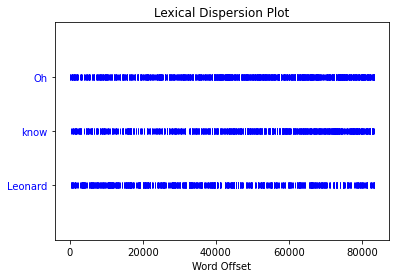

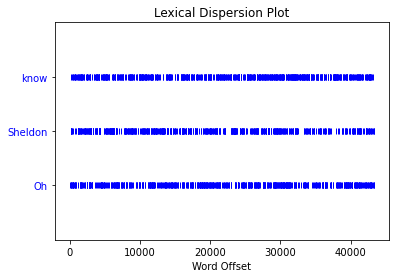

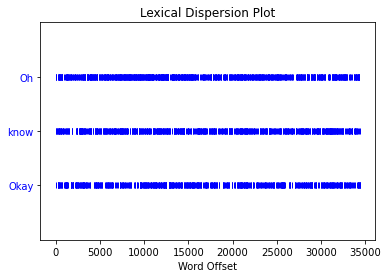

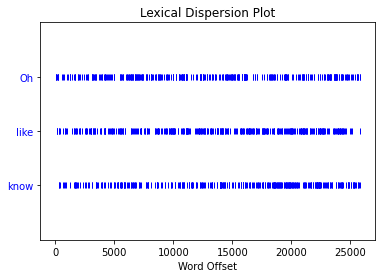

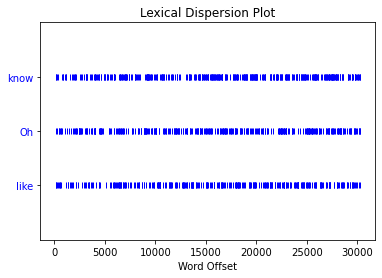

In [37]:
cont = 0
for i in nombres:
    nltk.Text(nombres[i]).dispersion_plot(mas_repetidas1[cont])
    cont+=1

In [42]:
df = pd.DataFrame()
cont = 0
lista_nombres = ['Sheldon','Leonard','Penny','Raj','Howard']
for i in list(zip(riqueza_lexica,mas_repetidas1,similares,lista_apaches)):
    df[lista_nombres[cont]] = list(i)
    cont+=1

Sheldon  \
0                                           0.191714   
1                                [Leonard, know, Oh]   
2                  [dear, Leonard, Well, good, know]   
3  [epinephrine, chopsticks, Thailand, Interestin...   

                                             Leonard  \
0                                           0.182999   
1                                [Oh, Sheldon, know]   
2                     [Yes, Yeah, sure, Uh, Sheldon]   
3  [Pad, carbohydrate, matches, decelerates, pred...   

                                              Penny  \
0                                          0.164261   
1                                  [Okay, know, Oh]   
2                    [okay, God, Yeah, right, Okay]   
3  [interrupting, minimum, wage, furniture, appear]   

                                                 Raj  \
0                                           0.246182   
1                                   [know, like, Oh]   
2                         [Okay, uh, um, God, great]   
3  [chopsticks, chatter, chattee, intoxicating, B...   

                                              Howard  
0                                           0.231043  
1                                   [like, Oh, know]  
2                           [Wow, oh, hey, sir, God]  
3  [flawless, cheesecake–scented, Goddess, hugged...

In [43]:
df.index = ['Riqueza Lexica','Palabras mas utilizadas','Palabras similares (0-5)','Hapax(0-5)']
df

Sheldon  \
Riqueza Lexica                                                     0.191714   
Palabras mas utilizadas                                 [Leonard, know, Oh]   
Palabras similares (0-5)                  [dear, Leonard, Well, good, know]   
Hapax(0-5)                [epinephrine, chopsticks, Thailand, Interestin...   

                                                                    Leonard  \
Riqueza Lexica                                                     0.182999   
Palabras mas utilizadas                                 [Oh, Sheldon, know]   
Palabras similares (0-5)                     [Yes, Yeah, sure, Uh, Sheldon]   
Hapax(0-5)                [Pad, carbohydrate, matches, decelerates, pred...   

                                                                     Penny  \
Riqueza Lexica                                                    0.164261   
Palabras mas utilizadas                                   [Okay, know, Oh]   
Palabras similares (0-5)                    [okay, God, Yeah, right, Okay]   
Hapax(0-5)                [interrupting, minimum, wage, furniture, appear]   

                                                                        Raj  \
Riqueza Lexica                                                     0.246182   
Palabras mas utilizadas                                    [know, like, Oh]   
Palabras similares (0-5)                         [Okay, uh, um, God, great]   
Hapax(0-5)                [chopsticks, chatter, chattee, intoxicating, B...   

                                                                     Howard  
Riqueza Lexica                                                     0.231043  
Palabras mas utilizadas                                    [like, Oh, know]  
Palabras similares (0-5)                           [Wow, oh, hey, sir, God]  
Hapax(0-5)                [flawless, cheesecake–scented, Goddess, hugged...

# WORDCLOUD SHELDON

In [54]:
mask = np.array(Image.open('sheldon.png'))   
mask.shape

(876, 800, 4)

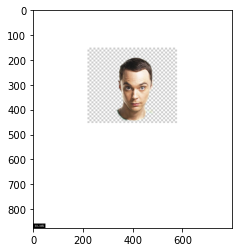

In [55]:
plt.imshow(mask)
img = mask.copy()

In [56]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        x,y,z = img[i,j][0],img[i,j][1],img[i,j][2]
        if x == 255 and y == 255 and z == 255:
            x,y,z,h = 0,0,0,0
        elif (x > 200 and x < 220) and  (y > 200 and y < 220) and (z > 200 and z < 220):
            x,y,z,h = 0,0,0,0
        else:
            x,y,z,h = 255,255,255,255
        img[i,j][0:3] = (x,y,z)


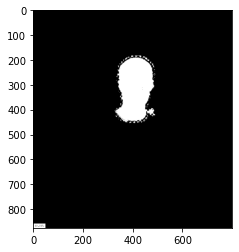

In [57]:
plt.imshow(img)

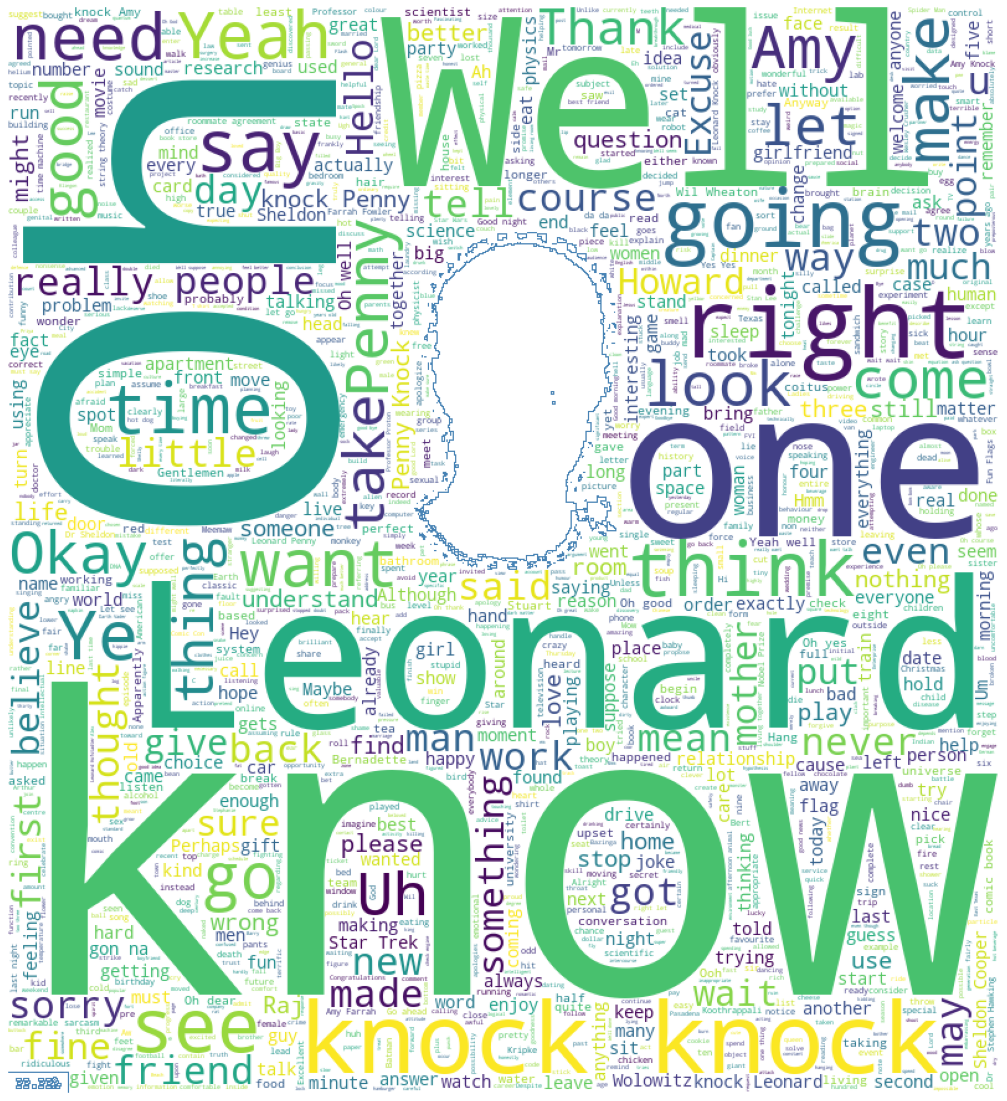

In [68]:
stopwords=STOPWORDS

texto = ''
for i in nombres['Sheldon']:
    texto+=i+' '
texto

wc = WordCloud(background_color="white", max_words=len(nombres['Sheldon']), mask=img,
               stopwords=stopwords, contour_width=0.5, contour_color='steelblue')

wc.generate(texto)


fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wc)
ax.axis('off')
#alice_wc.to_file("imagenalicia.png")
plt.show()